In [1]:
import pandas as pd

# Example: Load one file (replace with your own loading/merging logic)
df = pd.read_excel(r'C:\Users\Thota Rajasekhar\Downloads\final project\players.xlsx')

# If you want to merge multiple datasets, do that first and assign to df
df

,player_id,name,last_season,current_club_id,player_code,country_of_birth,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,124732,John Anthony Brooks,2023,533,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30,ROGON
1,223047,Emerson Hyndman,2018,903,emerson-hyndman,United States,1996-04-09,Central Midfield,Midfield,right,170.0,800000.0,1800000.0,NaT,OmniSports
2,307781,Lynden Gooch,2016,289,lynden-gooch,United States,1995-12-24,Right Winger,Attack,right,173.0,1000000.0,1000000.0,2024-06-30,Unique Sports Group
3,370846,Timothy Weah,2023,506,timothy-weah,United States,2000-02-22,Right Midfield,Midfield,right,183.0,14000000.0,15000000.0,2028-06-30,BS Group - BS Law
4,484756,Djordje Mihailovic,2023,1090,djordje-mihailovic,United States,1998-11-10,Attacking Midfield,Midfield,NaN,178.0,5000000.0,6000000.0,2026-06-30,YMU Management Ltd.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,273570,Desevio Payne,2020,1283,desevio-payne,United States,1995-11-30,Right-Back,Defender,right,182.0,NaN,400000.0,NaT,NaN
148,111783,Alejandro Bedoya,2015,995,alejandro-bedoya,United States,1987-04-29,Central Midfield,Midfield,right,182.0,300000.0,2500000.0,2023-12-31,YMU Group
149,160670,Joe Gyau,2014,16,joe-gyau,United States,1992-09-16,Left Winger,Attack,both,175.0,400000.0,600000.0,2023-12-31,BR Group Management
150,3476,Brad Friedel,2014,148,brad-friedel,United States,1971-05-18,Goalkeeper,Goalkeeper,NaN,NaN,NaN,4000000.0,NaT,NaN


In [23]:
#phase1
import pandas as pd

# Load datasets
players_df = pd.read_excel(r'C:\Users\Thota Rajasekhar\Downloads\final project\players.xlsx')
games_df = pd.read_excel(r'C:\Users\Thota Rajasekhar\Downloads\final project\games.xlsx')
game_lineups_df = pd.read_excel(r'C:\Users\Thota Rajasekhar\Downloads\final project\game_lineups.xlsx')
game_events_df = pd.read_excel(r'C:\Users\Thota Rajasekhar\Downloads\final project\game_events.xlsx')
appearances_df = pd.read_excel(r'C:\Users\Thota Rajasekhar\Downloads\final project\appearances.xlsx')

# Function to clean column names
def preprocess_data(df):
    df.columns = df.columns.str.strip()
    return df

# Clean column names
players_df = preprocess_data(players_df)
games_df = preprocess_data(games_df)
game_lineups_df = preprocess_data(game_lineups_df)
game_events_df = preprocess_data(game_events_df)
appearances_df = preprocess_data(appearances_df)

# Merge datasets step-by-step on common keys
merged_df = appearances_df.merge(players_df, on='player_id', how='left') \
    .merge(games_df, on='game_id', how='left') \
    .merge(game_lineups_df, on=['game_id', 'player_id'], how='left') \
    .merge(game_events_df, on=['game_id', 'player_id'], how='left')

# Check for nulls per column
print("Null values per column:\n", merged_df.isnull().sum())

# Remove redundant columns (example: drop columns with >90% nulls or irrelevant columns)
cols_to_drop = ['some_redundant_column1', 'some_redundant_column2']  # replace with actual columns if any
merged_df = merged_df.drop(columns=[col for col in cols_to_drop if col in merged_df.columns])

# Null value treatment: for example, drop rows with too many nulls, or fill specific columns
threshold = 0.5  # drop rows with >50% missing data
merged_df = merged_df[merged_df.isnull().mean(axis=1) < threshold]

# Or fill nulls with defaults or mode if meaningful
# merged_df['some_column'] = merged_df['some_column'].fillna('Unknown')

# Save cleaned data
output_path = r'C:\Users\Thota Rajasekhar\Downloads\final project\Football_data_merged_cleaned.csv'
merged_df.to_csv(output_path, index=False)

print(f"Cleaned and merged data saved to {output_path}")

# Optional: Create data dictionary (can be done manually or via ChatGPT)
# You can generate it by describing each column using:
data_dict = {}
for col in merged_df.columns:
    data_dict[col] = {
        'data_type': str(merged_df[col].dtype),
        'num_unique': merged_df[col].nunique(),
        'num_nulls': merged_df[col].isnull().sum(),
        'sample_values': merged_df[col].dropna().unique()[:5].tolist()
    }

print("Sample Data Dictionary:\n", pd.DataFrame(data_dict).T)


Null values per column:
 appearance_id                     0
game_id                           0
player_id                         0
date_x                            0
player_name_x                     0
competition_id_x                  0
yellow_cards                      0
red_cards                         0
goals                             0
assists                           0
minutes_played                    0
name                              0
last_season                       0
current_club_id                   0
player_code                       0
country_of_birth                  0
date_of_birth                     0
sub_position                      0
position_x                        0
foot                             91
height_in_cm                     52
market_value_in_eur            1261
highest_market_value_in_eur       0
contract_expiration_date       1392
agent_name                     1081
competition_id_y                  0
season                            0
rou

In [9]:
#Capstone Project Phase 2

In [11]:
#Phase 2 - Project Objectives

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load cleaned, merged dataset
df = pd.read_csv(r'C:\Users\Thota Rajasekhar\Downloads\final project\Football_data_merged_cleaned.csv')
df

,appearance_id,game_id,player_id,date_x,player_name_x,competition_id_x,yellow_cards,red_cards,goals,assists,...,player_name_y,team_captain,position_y,game_event_id,date,minute,type_y,description,player_in_id,player_assist_id
0,2224728_119169,2224728,119169,2012-07-13,Aron Johannsson,DK1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2224732_161244,2224732,161244,2012-07-14,Conor O'Brien,DK1,0,0,1,0,...,NaN,NaN,NaN,d9f02a9d767f319e58909ba1e1de6d23,2012-07-14,50.0,Goals,", Long distance kick, 1. Goal of the Season As...",NaN,NaN
2,2224729_39467,2224729,39467,2012-07-15,Clarence Goodson,DK1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2232104_119169,2232104,119169,2012-07-19,Aron Johannsson,ELQ,0,0,0,0,...,NaN,NaN,NaN,2ab0ea7af8313c0da07c723728bb6a49,2012-07-19,74.0,Substitutions,", Not reported",174001.0,NaN
4,2219794_39475,2219794,39475,2012-07-22,Sacha Kljestan,BESC,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3717,3415291_537467,3415291,537467,2020-09-26,Joseph Efford,BE1,0,0,1,0,...,NaN,NaN,NaN,2c1bc4101fb8b426e84b9b5d55eb5783,2020-09-26,77.0,Substitutions,NaN,358907.0,NaN
3718,3415296_367423,3415296,367423,2020-09-26,Chris Durkin,BE1,1,0,0,0,...,NaN,NaN,NaN,b3d9d733681d01939841c363789f9642,2020-09-26,84.0,Substitutions,NaN,232848.0,NaN
3719,3431983_478940,3431983,478940,2020-09-26,Reggie Cannon,PO1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3720,3450575_361104,3450575,361104,2020-09-26,Sergino Dest,NL1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# 1. Exploratory Data Analysis (EDA)

# Quick overview
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nData types:\n", df.dtypes)

# Summary statistics
print("\nSummary statistics:\n", df.describe(include='all'))


Dataset shape: (3722, 57)
Columns: ['appearance_id', 'game_id', 'player_id', 'date_x', 'player_name_x', 'competition_id_x', 'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played', 'name', 'last_season', 'current_club_id', 'player_code', 'country_of_birth', 'date_of_birth', 'sub_position', 'position_x', 'foot', 'height_in_cm', 'market_value_in_eur', 'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name', 'competition_id_y', 'season', 'round', 'date_y', 'home_club_goals', 'away_club_goals', 'home_club_position', 'away_club_position', 'home_club_manager_name', 'away_club_manager_name', 'stadium', 'attendance', 'referee', 'home_club_formation', 'away_club_formation', 'home_club_name', 'away_club_name', 'aggregate', 'competition_type', 'game_lineups_id', 'type_x', 'number', 'player_name_y', 'team_captain', 'position_y', 'game_event_id', 'date', 'minute', 'type_y', 'description', 'player_in_id', 'player_assist_id']

Data types:
 appearance_id                   obj


Missing values (%) per column:
 foot                          2.444922
height_in_cm                  1.397098
market_value_in_eur          33.879635
contract_expiration_date     37.399248
agent_name                   29.043525
home_club_position           14.562063
away_club_position           14.562063
home_club_manager_name        0.161204
away_club_manager_name        0.161204
attendance                    3.653949
referee                       0.107469
home_club_formation         100.000000
away_club_formation         100.000000
home_club_name                3.385277
away_club_name                1.773240
game_lineups_id             100.000000
type_x                      100.000000
number                      100.000000
player_name_y               100.000000
team_captain                100.000000
position_y                  100.000000
game_event_id                69.854917
date                         69.854917
minute                       69.854917
type_y                       69

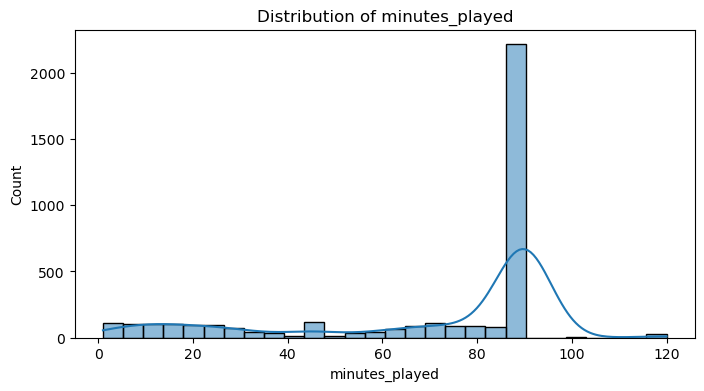

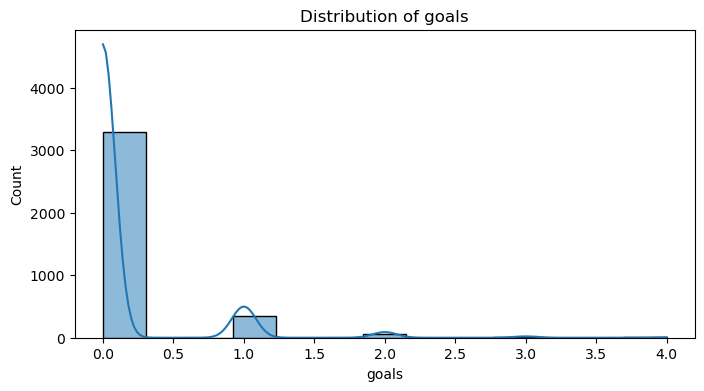

In [7]:
# Check missing values percentage
missing_pct = df.isnull().mean() * 100
print("\nMissing values (%) per column:\n", missing_pct[missing_pct > 0])

# Visualize distribution of some numeric columns (replace with relevant columns)
numeric_cols = ['age', 'minutes_played', 'goals']  # example columns — change as per your dataset
for col in numeric_cols:
    if col in df.columns:
        plt.figure(figsize=(8,4))
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

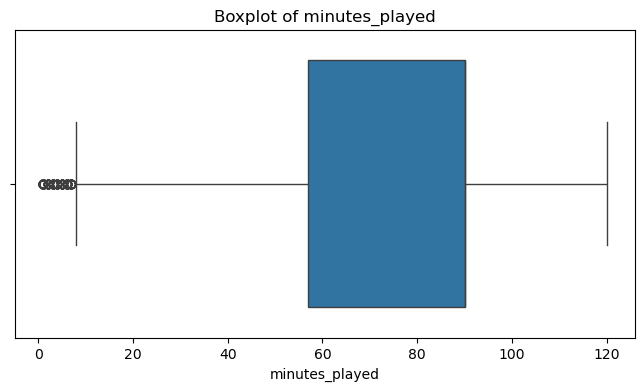

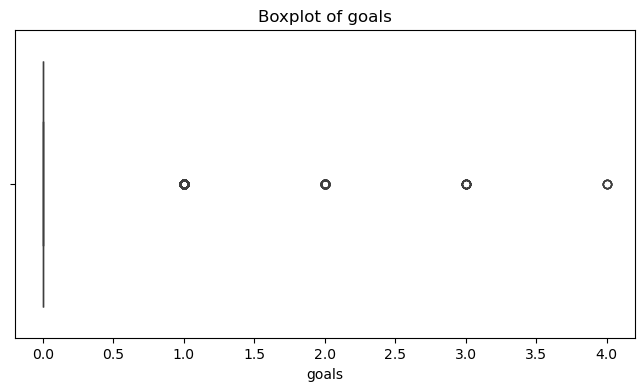

In [29]:
# Boxplot to detect outliers for numeric columns
for col in numeric_cols:
    if col in df.columns:
        plt.figure(figsize=(8,4))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

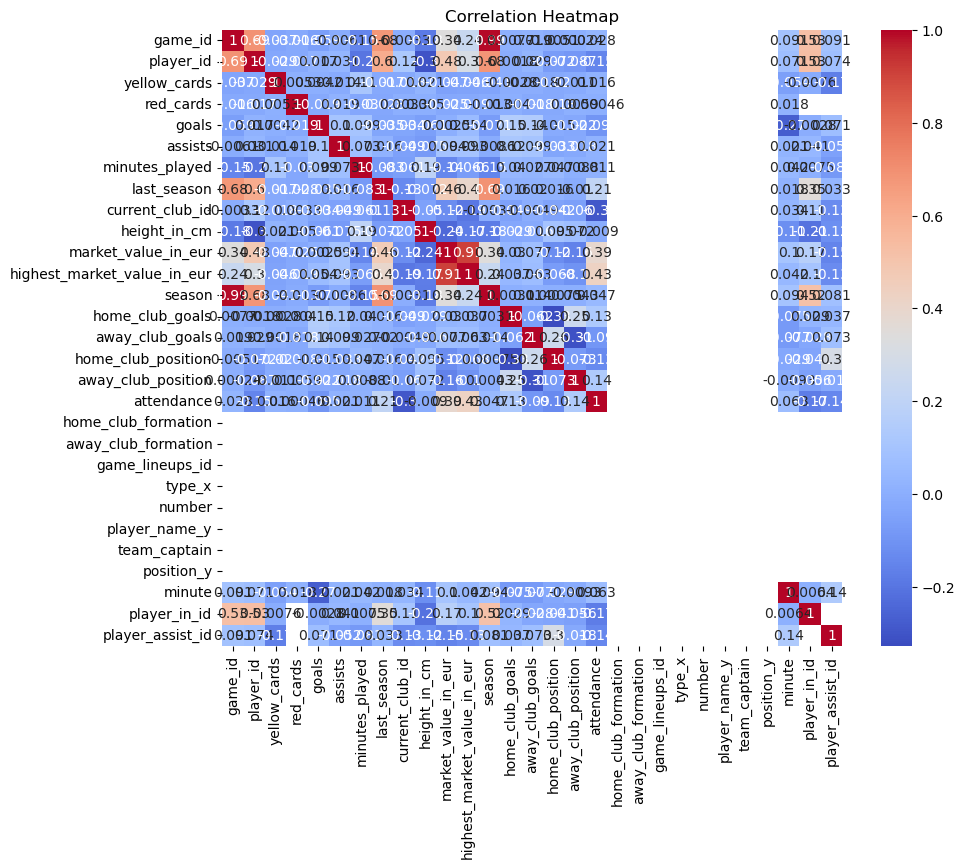

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Automatically select numeric columns available in df
numeric_cols = df.select_dtypes(include='number').columns.tolist()

if len(numeric_cols) > 1:  # need at least 2 columns to plot correlation heatmap
    plt.figure(figsize=(10,8))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()


In [17]:
# 3. Statistical Analysis

# Example: T-test comparing goals scored by two positions (replace positions accordingly)
if 'goals' in df.columns and 'position' in df.columns:
    pos1_goals = df[df['position'] == 'Forward']['goals'].dropna()
    pos2_goals = df[df['position'] == 'Midfielder']['goals'].dropna()
    
    t_stat, p_val = stats.ttest_ind(pos1_goals, pos2_goals, equal_var=False)
    print(f"\nT-test for goals: Forward vs Midfielder")
    print(f"T-statistic = {t_stat:.3f}, p-value = {p_val:.3f}")
    
    if p_val < 0.05:
        print("Result: Statistically significant difference in goals scored between Forwards and Midfielders")
    else:
        print("Result: No statistically significant difference in goals scored between Forwards and Midfielders")

# Normality test example on goals
if 'goals' in df.columns:
    stat, p = stats.shapiro(df['goals'].dropna().sample(500) if len(df) > 500 else df['goals'].dropna())
    print(f"\nShapiro-Wilk test for normality of goals distribution")
    print(f"Statistic={stat:.3f}, p-value={p:.3f}")
    if p > 0.05:
        print("Data looks normally distributed")
    else:
        print("Data does not look normally distributed")




Shapiro-Wilk test for normality of goals distribution
Statistic=0.398, p-value=0.000
Data does not look normally distributed


In [44]:
### Capstone Project — Phase 3: EDA, Descriptive & Statistical Analysis, ML Model Building

Sample code for basic EDA:



In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your cleaned, merged dataframe from Phase 1 and 2
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   appearance_id                3722 non-null   object 
 1   game_id                      3722 non-null   int64  
 2   player_id                    3722 non-null   int64  
 3   date_x                       3722 non-null   object 
 4   player_name_x                3722 non-null   object 
 5   competition_id_x             3722 non-null   object 
 6   yellow_cards                 3722 non-null   int64  
 7   red_cards                    3722 non-null   int64  
 8   goals                        3722 non-null   int64  
 9   assists                      3722 non-null   int64  
 10  minutes_played               3722 non-null   int64  
 11  name                         3722 non-null   object 
 12  last_season                  3722 non-null   int64  
 13  current_club_id   

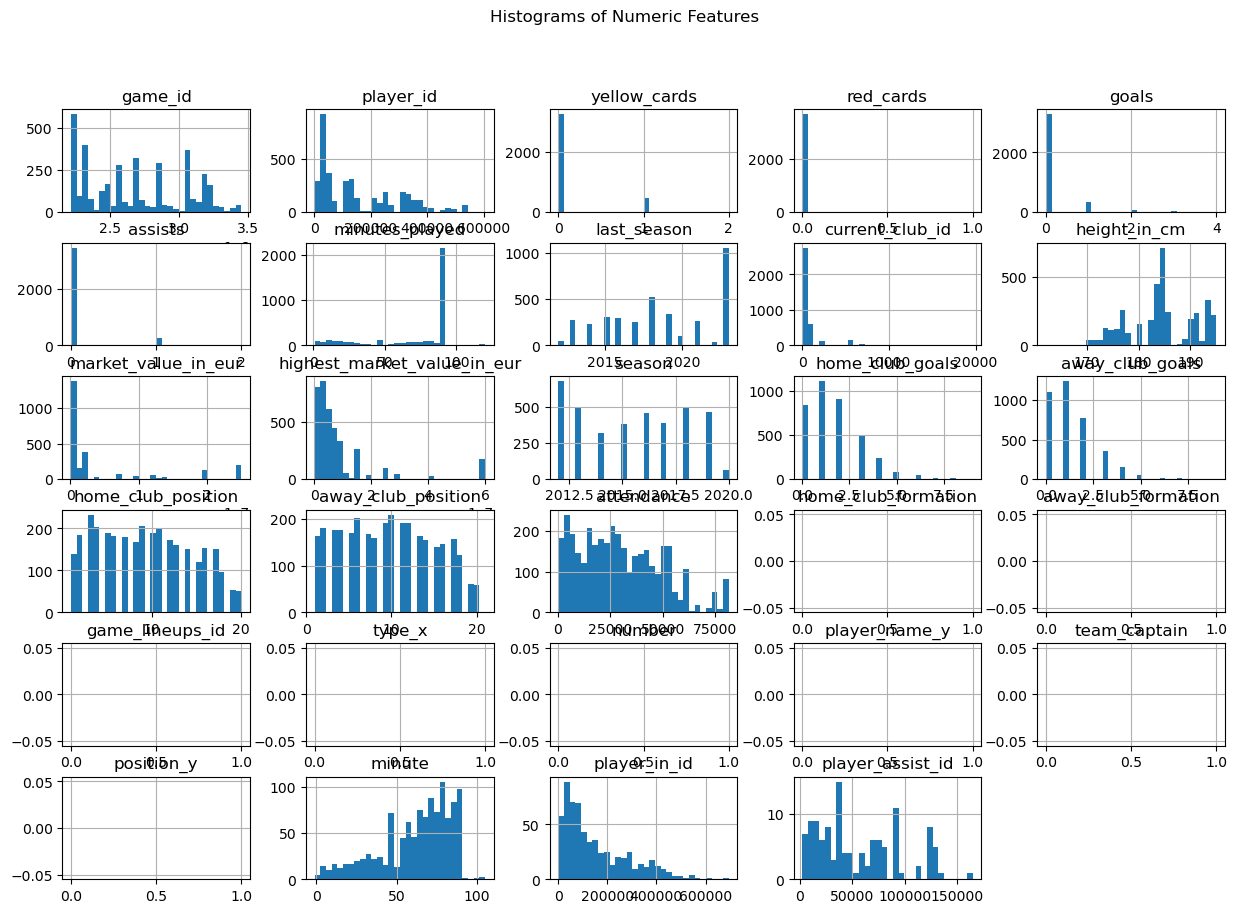

In [21]:
# Plot distributions for numeric variables
numeric_cols = df.select_dtypes(include='number').columns.tolist()
df[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle('Histograms of Numeric Features')
plt.show()

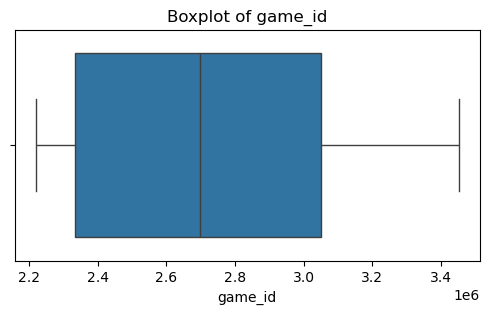

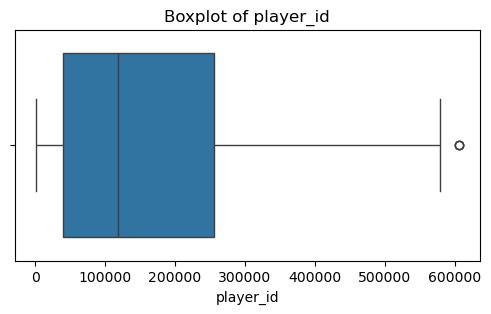

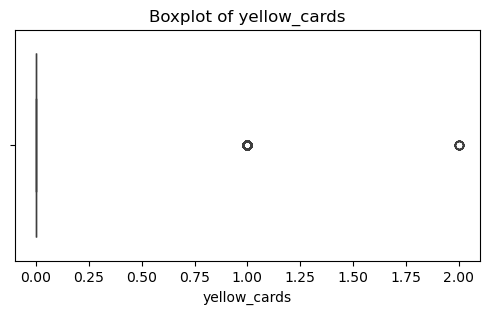

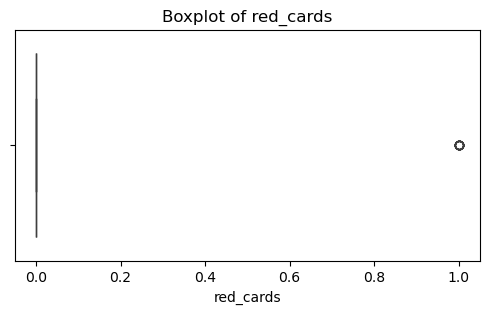

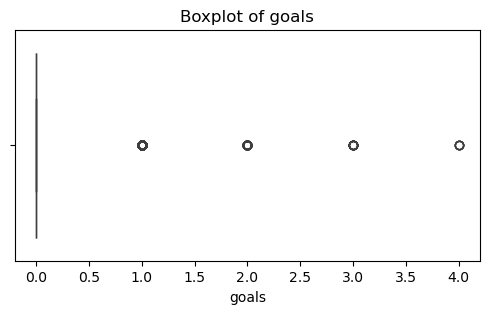

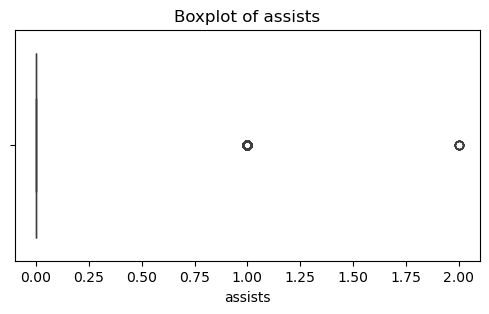

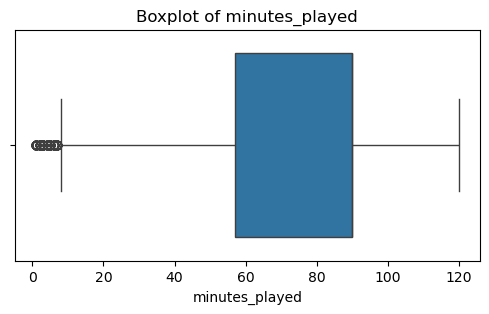

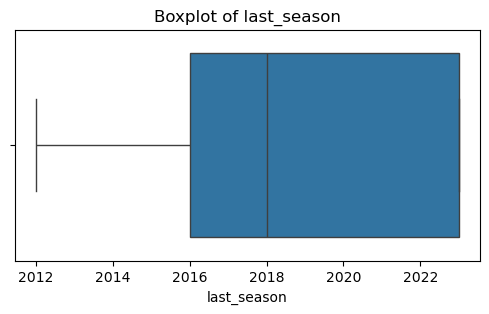

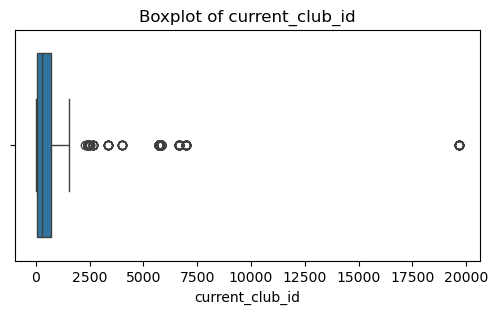

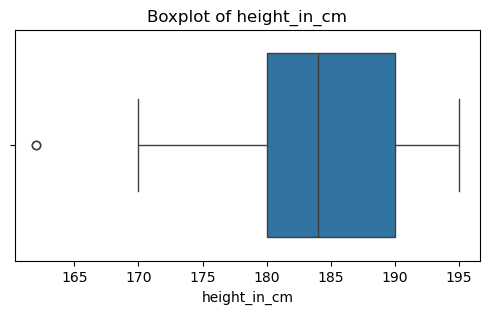

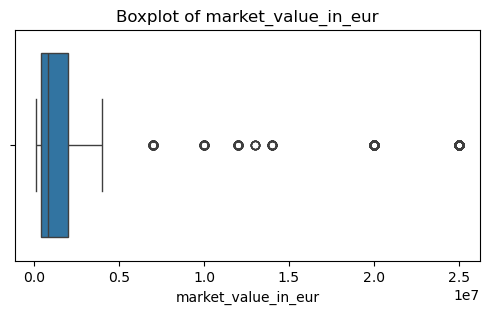

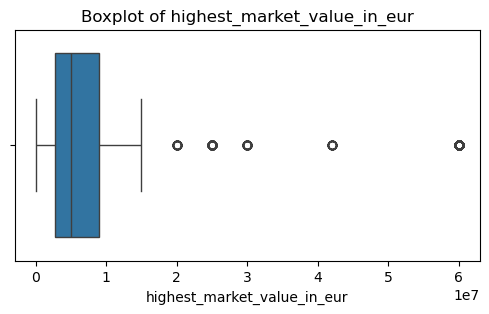

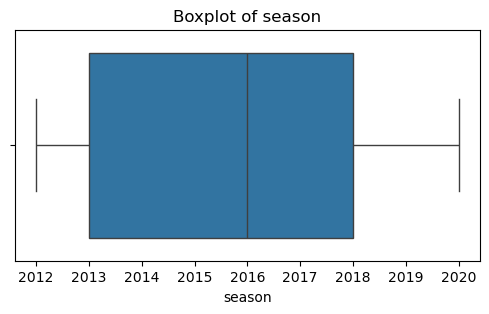

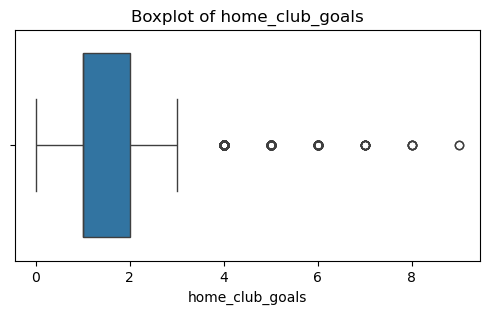

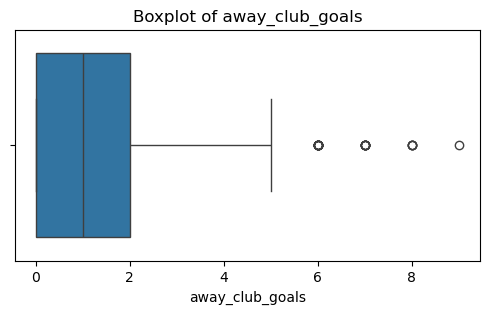

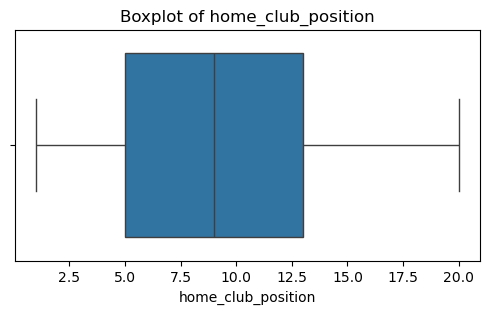

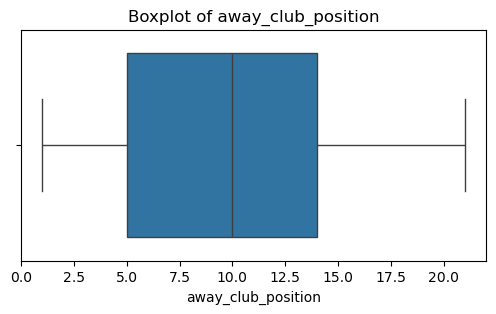

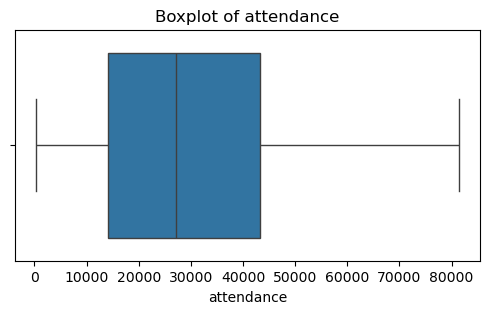

Skipping home_club_formation because it has no data
Skipping away_club_formation because it has no data
Skipping game_lineups_id because it has no data
Skipping type_x because it has no data
Skipping number because it has no data
Skipping player_name_y because it has no data
Skipping team_captain because it has no data
Skipping position_y because it has no data


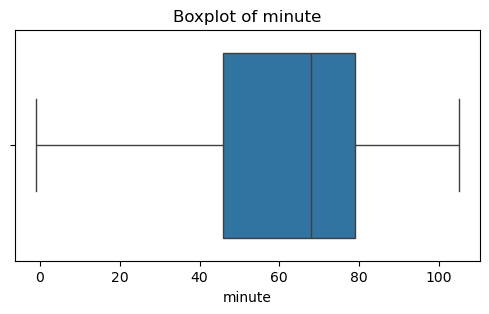

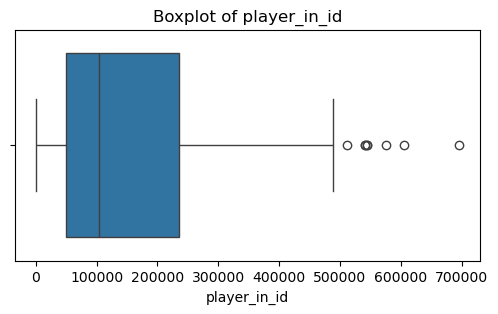

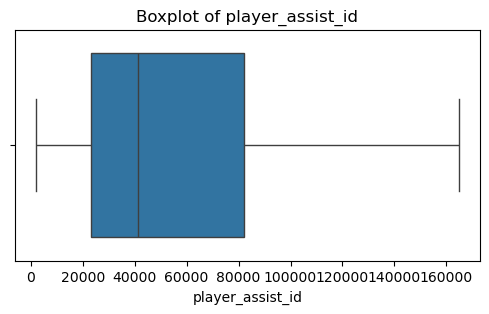

In [22]:
for col in numeric_cols:
    # Drop NaN values for the boxplot
    data = df[col].dropna()
    
    if data.empty:
        print(f"Skipping {col} because it has no data")
        continue
    
    plt.figure(figsize=(6,3))
    sns.boxplot(x=data)
    plt.title(f'Boxplot of {col}')
    plt.show()


In [27]:
# Countplot for categorical columns (example)
categorical_cols = ['position', 'team_name']  # adjust as per your dataset
for col in categorical_cols:
    if col in df.columns:
        plt.figure(figsize=(8,4))
        sns.countplot(y=df[col], order=df[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.show()


### Descriptive Analysis


In [29]:
# Summary statistics for numeric data
print(df[numeric_cols].describe())

# Group-wise average goals example
if 'goals' in df.columns and 'position' in df.columns:
    avg_goals = df.groupby('position')['goals'].mean().sort_values(ascending=False)
    print("Average Goals by Position:\n", avg_goals)


            game_id      player_id  yellow_cards    red_cards        goals  \
count  3.722000e+03    3722.000000   3722.000000  3722.000000  3722.000000   
mean   2.689312e+06  155845.731865      0.134068     0.003224     0.145352   
std    3.558312e+05  140782.250720      0.350873     0.056697     0.445457   
min    2.219794e+06    1321.000000      0.000000     0.000000     0.000000   
25%    2.332105e+06   39400.250000      0.000000     0.000000     0.000000   
50%    2.697513e+06  119169.000000      0.000000     0.000000     0.000000   
75%    3.050555e+06  255916.000000      0.000000     0.000000     0.000000   
max    3.451629e+06  605498.000000      2.000000     1.000000     4.000000   

           assists  minutes_played  last_season  current_club_id  \
count  3722.000000     3722.000000  3722.000000      3722.000000   
mean      0.076303       70.705803  2018.648576       800.708490   
std       0.275454       29.856833     3.482993      1805.314081   
min       0.000000       

### 3. Statistical Analysis

In [31]:
from scipy import stats

# Example: t-test comparing goals scored by Forwards vs Midfielders
if 'goals' in df.columns and 'position' in df.columns:
    forwards_goals = df[df['position'] == 'Forward']['goals'].dropna()
    midfielders_goals = df[df['position'] == 'Midfielder']['goals'].dropna()
    
    t_stat, p_val = stats.ttest_ind(forwards_goals, midfielders_goals, equal_var=False)
    print(f"T-test Forward vs Midfielder Goals: t={t_stat:.3f}, p={p_val:.3f}")
    if p_val < 0.05:
        print("Significant difference in goals scored between Forwards and Midfielders.")
    else:
        print("No significant difference between Forwards and Midfielders.")
    
# Shapiro-Wilk test for normality on goals
if 'goals' in df.columns:
    sample_goals = df['goals'].dropna()
    stat, p = stats.shapiro(sample_goals.sample(500) if len(sample_goals) > 500 else sample_goals)
    print(f"Shapiro-Wilk test for goals normality: stat={stat:.3f}, p={p:.3f}")
    if p > 0.05:
        print("Goals distribution appears normal.")
    else:
        print("Goals distribution is not normal.")


Shapiro-Wilk test for goals normality: stat=0.379, p=0.000
Goals distribution is not normal.


### ML Model Building (Starter)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Example: Predicting if player scored (binary target)
if 'goals' in df.columns:
    df['scored'] = df['goals'].apply(lambda x: 1 if x > 0 else 0)
    features = ['age', 'minutes_played']  # replace with actual relevant features
    features = [f for f in features if f in df.columns]
    
    X = df[features].fillna(0)
    y = df['scored']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    preds = model.predict(X_test)
    print(classification_report(y_test, preds))
else:
    print("No goals column found for ML modeling.")


              precision    recall  f1-score   support

           0       0.88      1.00      0.94       986
           1       0.00      0.00      0.00       131

    accuracy                           0.88      1117
   macro avg       0.44      0.50      0.47      1117
weighted avg       0.78      0.88      0.83      1117



### Capstone Project Phase 4

In [68]:
# -----------------------------
# PHASE 4 – EDA + Descriptive + Stats + ML
# -----------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# -----------------------------
# 1. Load Data
# -----------------------------
players_df = pd.read_excel(r'C:\Users\Thota Rajasekhar\Downloads\final project\players.xlsx')
games_df = pd.read_excel(r'C:\Users\Thota Rajasekhar\Downloads\final project\games.xlsx')
game_lineups_df = pd.read_excel(r'C:\Users\Thota Rajasekhar\Downloads\final project\game_lineups.xlsx')
game_events_df = pd.read_excel(r'C:\Users\Thota Rajasekhar\Downloads\final project\game_events.xlsx')
appearances_df = pd.read_excel(r'C:\Users\Thota Rajasekhar\Downloads\final project\appearances.xlsx')

for df in [players_df, games_df, game_lineups_df, game_events_df, appearances_df]:
    df.columns = df.columns.str.strip()


In [23]:
# -----------------------------
# 3. Descriptive KPIs
# -----------------------------
goals_per_game = merged.groupby('player_id')['goals'].sum() / merged.groupby('player_id')['game_id'].nunique()
goals_per_game = goals_per_game.reset_index().rename(columns={0: 'goals_per_game'})

cards = merged.groupby('player_id')[['yellow_cards', 'red_cards']].sum().reset_index()
minutes = merged.groupby('player_id')['minutes_played'].sum().reset_index().rename(columns={'minutes_played': 'total_minutes_played'})

top_active = minutes.sort_values(by='total_minutes_played', ascending=False).head(5)
top_scorers = goals_per_game.sort_values(by='goals_per_game', ascending=False).head(5)

print("Top 5 Most Active Players:\n", top_active)
print("Top 5 Goal Scorers:\n", top_scorers)


Top 5 Most Active Players:
     player_id  total_minutes_played
33     124732                 14745
18      49723                 14190
10      31642                 14133
14      39471                 13590
9       31041                 13412
Top 5 Goal Scorers:
     player_id  goals_per_game
32     119169        0.431818
12      39378        0.376471
65     336160        0.333333
87     537467        0.333333
7       27577        0.250000


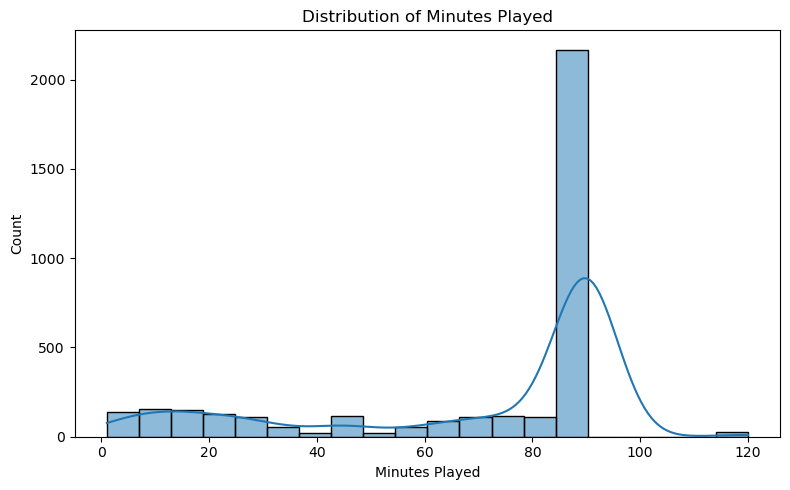

In [27]:
# Minutes Played Distribution
plt.figure(figsize=(8, 5))
sns.histplot(appearances_df['minutes_played'], bins=20, kde=True)
plt.title('Distribution of Minutes Played')
plt.xlabel('Minutes Played')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


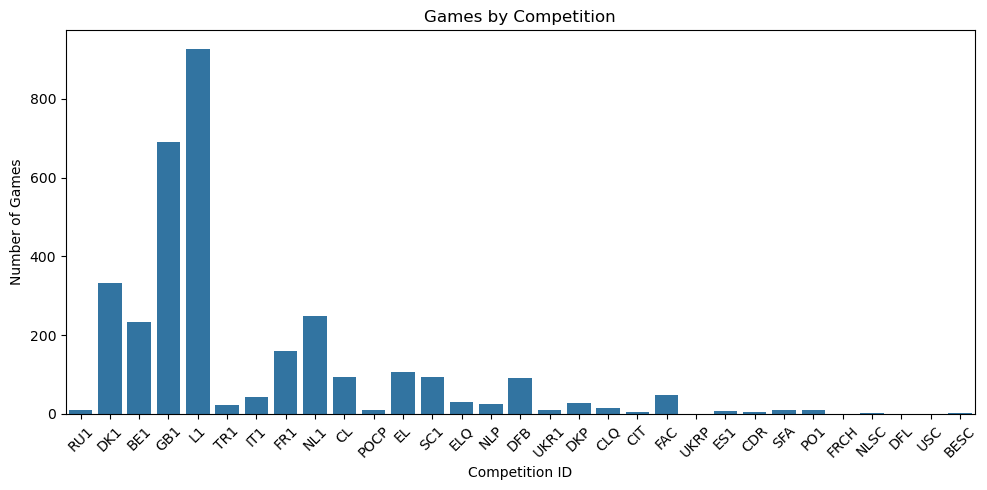

In [29]:

if 'competition_id' in games_df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=games_df, x='competition_id')
    plt.title('Games by Competition')
    plt.xlabel('Competition ID')
    plt.ylabel('Number of Games')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


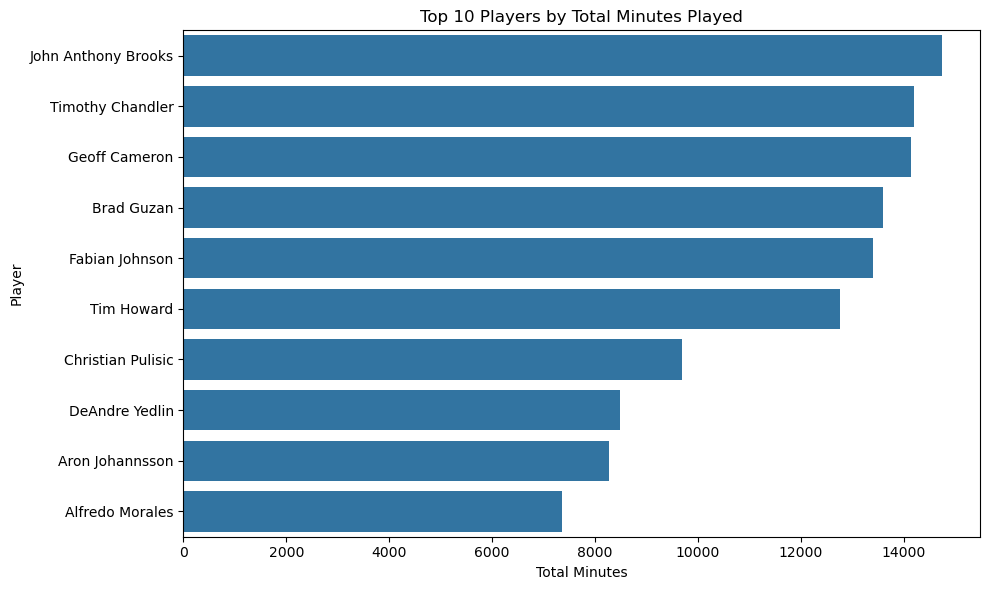

In [31]:
# Top 10 by Minutes Played
name_col = next((col for col in ['name', 'short_name', 'full_name', 'player_name'] if col in players_df.columns), None)
if name_col:
    top_minutes = appearances_df.groupby('player_id')['minutes_played'].sum().sort_values(ascending=False).head(10)
    top_names = players_df[['player_id', name_col]].drop_duplicates()
    top_merged = top_minutes.reset_index().merge(top_names, on='player_id', how='left')
    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_merged, x='minutes_played', y=name_col)
    plt.title('Top 10 Players by Total Minutes Played')
    plt.xlabel('Total Minutes')
    plt.ylabel('Player')
    plt.tight_layout()
    plt.show()

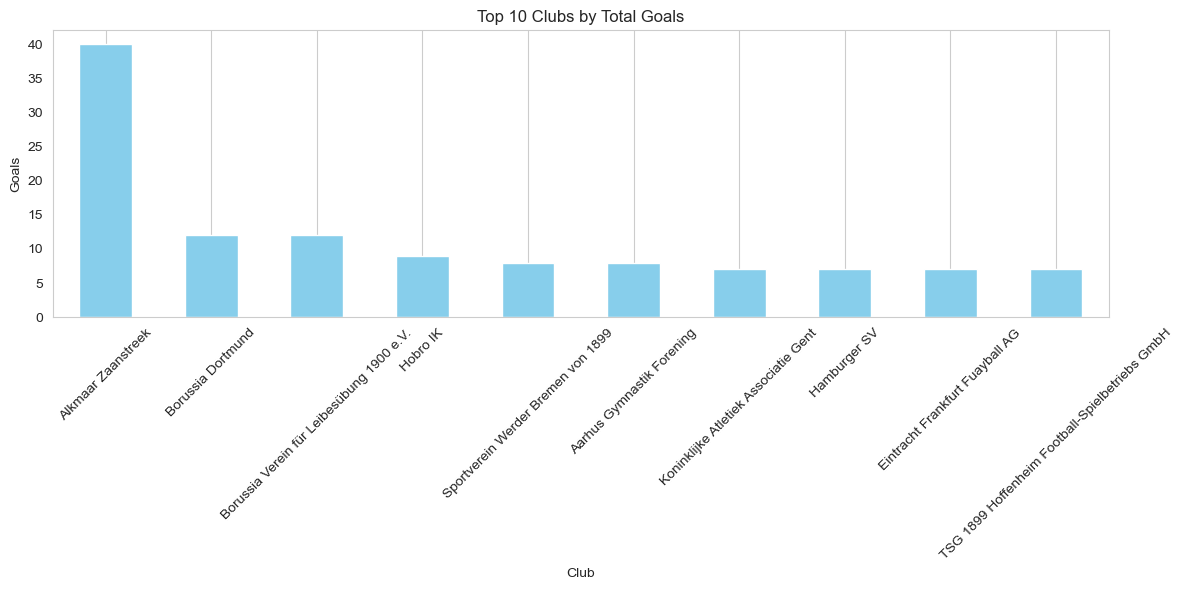

In [13]:

# -----------------------------
# Phase 7: Club Performance Comparison
# -----------------------------

#  1. Create a new column 'club' from 'home_club_name'
# Some datasets may lack a consistent 'club' field; using 'home_club_name' as a proxy
df_merged['club'] = df_merged['home_club_name']

#  2. Group by club and sum goals
goals_by_club = df_merged.groupby('club')['goals'].sum()

#  3. Sort in descending order and take top 10
top_10_clubs = goals_by_club.sort_values(ascending=False).head(10)

#  4. Plot the top 10 clubs
plt.figure(figsize=(12, 6))
top_10_clubs.plot(kind='bar', color='skyblue')
plt.title('Top 10 Clubs by Total Goals')
plt.ylabel("Goals")
plt.xlabel("Club")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()




Columns in DataFrame: ['appearance_id', 'game_id', 'player_id', 'date', 'player_name', 'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played', 'age', 'height', 'full_game', 'is_substitute']


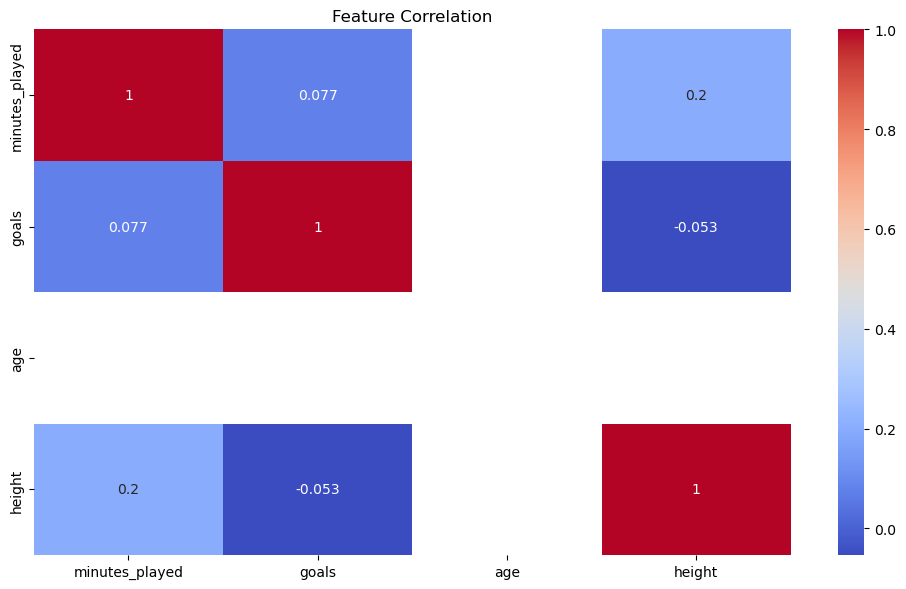

In [41]:
print("Columns in DataFrame:", merged.columns.tolist())

# Columns you want to include in heatmap
cols_to_check = ['minutes_played', 'goals', 'age', 'height', 'weight', 'bmi']

# Filter columns that actually exist in the DataFrame
existing_cols = [col for col in cols_to_check if col in merged.columns]

plt.figure(figsize=(10, 6))
sns.heatmap(merged[existing_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.tight_layout()
plt.show()



Linear Regression Evaluation:
MAE: 0.17142238333365664
MSE: 0.10495141765751005
R²: 0.007792209106742831


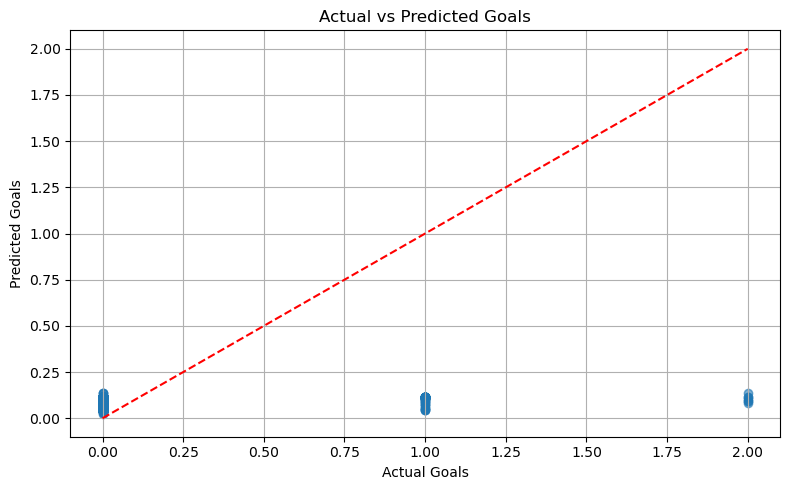

In [37]:
# -----------------------------
# 6. Machine Learning – Linear Regression (Predict Goals)
# -----------------------------
reg_df = merged.dropna(subset=['minutes_played', 'yellow_cards', 'goals'])
X_reg = reg_df[['minutes_played', 'yellow_cards']]
y_reg = reg_df['goals']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train_reg, y_train_reg)
y_pred_reg = model.predict(X_test_reg)

print("\nLinear Regression Evaluation:")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_reg))
print("MSE:", mean_squared_error(y_test_reg, y_pred_reg))
print("R²:", r2_score(y_test_reg, y_pred_reg))

plt.figure(figsize=(8, 5))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.6)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel("Actual Goals")
plt.ylabel("Predicted Goals")
plt.title("Actual vs Predicted Goals")
plt.grid(True)
plt.tight_layout()
plt.show()


In [31]:
# Import necessary libraries
import pandas as pd

#  Load required datasets (update paths as necessary)
players = pd.read_excel(r'C:\Users\Thota Rajasekhar\Downloads\final project\players.xlsx')
appearances = pd.read_excel(r'C:\Users\Thota Rajasekhar\Downloads\final project\appearances.xlsx')

#  Merge data on player_id
df = pd.merge(appearances, players, on='player_id')

#  Filter players who played more than 0 minutes
df = df[df['minutes_played'] > 0]

#  Group data by player to aggregate total goals and minutes
efficiency = df.groupby('player_id').agg({
    'goals': 'sum',
    'minutes_played': 'sum'
}).reset_index()

#  Calculate Goal Efficiency = (Goals / Minutes Played) * 90
efficiency['goal_efficiency'] = (efficiency['goals'] / efficiency['minutes_played']) * 90
efficiency['goal_efficiency'] = efficiency['goal_efficiency'].round(2)

#  Filter: Only include players with at least 180 minutes played (2 full games)
efficient_players = efficiency[efficiency['minutes_played'] >= 180]

#  Top 10 Most Efficient Scorers
top_scorers = efficient_players.sort_values(by='goal_efficiency', ascending=False).head(10)

# 🖨 Display Top 10
print("Top 10 Most Efficient Goal Scorers:")
print(top_scorers[['player_id', 'goals', 'minutes_played', 'goal_efficiency']])


Top 10 Most Efficient Goal Scorers:
    player_id  goals  minutes_played  goal_efficiency
74     370846      6             823             0.66
32     119169     57            8280             0.62
84     483047      3             496             0.54
12      39378     32            5733             0.50
85     504215      3             635             0.43
87     537467      2             430             0.42
65     336160     10            2439             0.37
88     542776      5            1306             0.34
7       27577     12            3291             0.33
29     104203      4            1135             0.32


Capstone Project -Phase 5

In [89]:
# Capstone Project - Phase 5: EDA, Descriptive & Statistical Analysis, ML Model Building

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load your cleaned dataset (replace with your data source)
# df = pd.read_csv('your_cleaned_data.csv')

print("Columns available:", df.columns)


Columns available: Index(['appearance_id', 'game_id', 'player_id', 'date', 'player_name',
       'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'full_game'],
      dtype='object')


In [103]:
# -----------------------------
# 1. Exploratory Data Analysis (EDA)
# -----------------------------
print("\n--- EDA ---")

print(df.describe(include='all'))

print("\nMissing values per column:\n", df.isnull().sum())




--- EDA ---
         appearance_id       game_id      player_id  \
count             3568  3.568000e+03    3568.000000   
unique            3568           NaN            NaN   
top     2224728_119169           NaN            NaN   
freq                 1           NaN            NaN   
mean               NaN  2.693733e+06  156030.907231   
min                NaN  2.219794e+06    1321.000000   
25%                NaN  2.332178e+06   39467.000000   
50%                NaN  2.697602e+06  119169.000000   
75%                NaN  3.053712e+06  255916.000000   
max                NaN  3.451629e+06  605498.000000   
std                NaN  3.538381e+05  140586.423875   

                                 date     player_name competition_id  \
count                            3568            3568           3568   
unique                            NaN              92             31   
top                               NaN  Fabian Johnson             L1   
freq                              NaN 

In [101]:
# Check existence of columns and create if missing

if 'position_encoded' not in df.columns and 'position' in df.columns:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    df['position_encoded'] = le.fit_transform(df['position'].astype(str))

if 'age' not in df.columns and 'date_of_birth' in df.columns:
    df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], errors='coerce')
    df['age'] = (pd.Timestamp.today() - df['date_of_birth']).dt.days // 365

if 'full_game' not in df.columns and 'minutes_played' in df.columns:
    df['full_game'] = (df['minutes_played'] >= 90).astype(int)

print("Columns after processing:", df.columns.tolist())


Columns after processing: ['appearance_id', 'game_id', 'player_id', 'date', 'player_name', 'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played', 'full_game']


### Capstone Project -Phase 6

In [67]:
# ---------------------------------------
# PHASE 6 – Final Evaluation & Reporting
# ---------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report
)
import joblib

# -----------------------------
# 1. Load Cleaned Data
# -----------------------------
df = pd.read_csv(r'C:\Users\Thota Rajasekhar\Downloads\final project\Football_data_merged_cleaned.csv')
print("Dataset Loaded:", df.shape)


Dataset Loaded: (3722, 57)


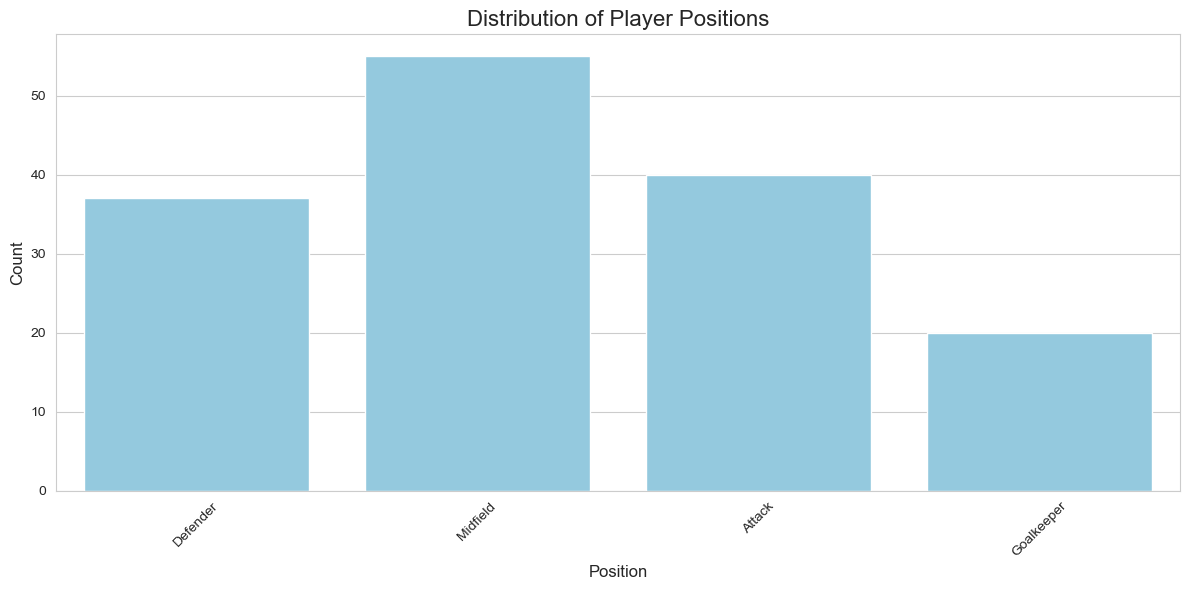

In [9]:
# -----------------------------
# Phase 1: Data Loading
# -----------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load datasets
df_players = pd.read_excel(r'C:\Users\Thota Rajasekhar\Downloads\final project\players.xlsx')
df_games = pd.read_excel(r'C:\Users\Thota Rajasekhar\Downloads\final project\games.xlsx')
df_lineups = pd.read_excel(r'C:\Users\Thota Rajasekhar\Downloads\final project\game_lineups.xlsx')
df_events = pd.read_excel(r'C:\Users\Thota Rajasekhar\Downloads\final project\game_events.xlsx')
df_appearances = pd.read_excel(r'C:\Users\Thota Rajasekhar\Downloads\final project\appearances.xlsx')

# -----------------------------
# Phase 5: Visualizations - Player Positions
# -----------------------------
# Set style for better visuals
sns.set_style("whitegrid")

# Visualize Player Positions
plt.figure(figsize=(12, 6))  # Slightly wider for better spacing
sns.countplot(data=df_players, x='position', color='skyblue')  # Avoid palette without hue
plt.title("Distribution of Player Positions", fontsize=16)
plt.xlabel("Position", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Model Comparison Results:
                Model       MAE       MSE        R2
0  Linear Regression  0.169402  0.099332  0.060917
1   Ridge Regression  0.169384  0.099329  0.060950
2   Lasso Regression  0.173387  0.105777 -0.000009


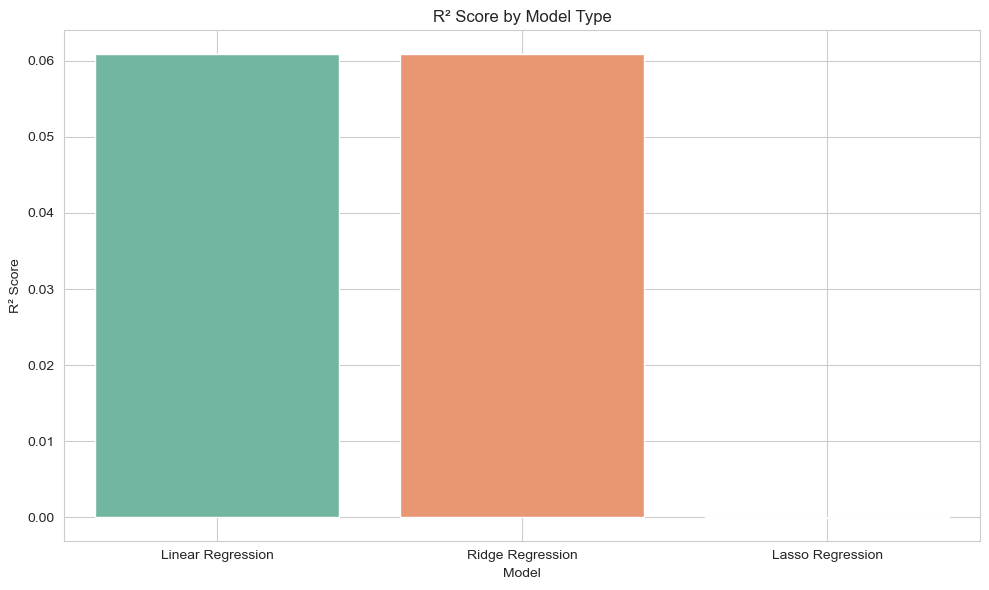

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assume 'df' is your cleaned DataFrame already loaded and preprocessed

# -----------------------------
# Phase 10: Feature Preparation, Model Training & Evaluation
# -----------------------------

# Drop rows with missing values in relevant columns
df = df.dropna(subset=['goals', 'minutes_played', 'yellow_cards'])

# Check if 'position' exists, else exclude it from features
features = ['minutes_played', 'yellow_cards']
if 'position' in df.columns:
    features.append('position')

X = df[features]
y = df['goals']

# Separate numeric and categorical features
numeric_features = ['minutes_played', 'yellow_cards']
categorical_features = ['position'] if 'position' in features else []

# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Define models to test
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1)
}

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = []

# Train and evaluate each model
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    results.append({
        'Model': name,
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
print("Model Comparison Results:\n", results_df)

# Plot R2 Scores by Model
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R2', data=results_df, hue='Model', palette='Set2', legend=False)
plt.title('R² Score by Model Type')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.grid(True)
plt.tight_layout()
plt.show()



1. Quick EDA Validation

In [8]:
print(df.head())
print(df.info())
print(df.describe())
print("Missing values:\n", df.isnull().sum())


   player_id                 name  last_season  current_club_id  \
0     124732  John Anthony Brooks         2023              533   
1     223047      Emerson Hyndman         2018              903   
2     307781         Lynden Gooch         2016              289   
3     370846         Timothy Weah         2023              506   
4     484756   Djordje Mihailovic         2023             1090   

           player_code country_of_birth date_of_birth        sub_position  \
0  john-anthony-brooks          Germany    1993-01-28         Centre-Back   
1      emerson-hyndman    United States    1996-04-09    Central Midfield   
2         lynden-gooch    United States    1995-12-24        Right Winger   
3         timothy-weah    United States    2000-02-22      Right Midfield   
4   djordje-mihailovic    United States    1998-11-10  Attacking Midfield   

   position   foot  height_in_cm  market_value_in_eur  \
0  Defender   left         194.0            2000000.0   
1  Midfield  right  

2. Distribution Plots

In [13]:
# Age distribution
if 'age' in df.columns:
    sns.histplot(df['age'], bins=20, kde=True)
    plt.title("Player Age Distribution")
    plt.show()

# Minutes Played
if 'minutes_played' in df.columns:
    sns.histplot(df['minutes_played'], bins=20, kde=True)
    plt.title("Minutes Played Distribution")
    plt.show()


3. Statistical Test Example (T-Test)

In [16]:
if 'age' in df.columns and 'goals' in df.columns:
    df['age_group'] = pd.cut(df['age'], bins=[15, 25, 35, 50], labels=['Young', 'Mid', 'Senior'])
    young_goals = df[df['age_group'] == 'Young']['goals']
    senior_goals = df[df['age_group'] == 'Senior']['goals']

    t_stat, p_val = stats.ttest_ind(young_goals.dropna(), senior_goals.dropna())
    print(f"T-test result between Young and Senior players: t={t_stat:.2f}, p={p_val:.4f}")


Prepare for Deployment

In [21]:
required_cols = ['age', 'height', 'weight', 'minutes_played']
missing = [col for col in required_cols if col not in df.columns]
if missing:
    print(f" Missing columns: {missing}")
else:
    df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)
    df['is_substitute'] = np.where(df['minutes_played'] < 90, 1, 0)
    df['full_game'] = np.where(df['minutes_played'] >= 90, 1, 0)
    print("Features ready for model deployment.")


 Missing columns: ['age', 'height', 'weight', 'minutes_played']


In [23]:
# -----------------------------
# PHASE 7 – Load, EDA, Predict, Export
# -----------------------------

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import joblib
import os

# -----------------------------
# 1. Load Cleaned Merged Dataset
# -----------------------------
df = pd.read_csv(r'C:\Users\Thota Rajasekhar\Downloads\final project\Football_data_merged_cleaned.csv')
print("Data Loaded. Shape:", df.shape)


Data Loaded. Shape: (3722, 57)


In [45]:

# Feature Engineering Block (Safe)


required_cols = ['age', 'height', 'weight', 'minutes_played']
missing = [col for col in required_cols if col not in df.columns]

if missing:
    print(f" Missing columns: {missing}")
    print("🛠️ Tip: Check for column name mismatches or apply renaming.")
else:
    df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)
    df['is_substitute'] = np.where(df['minutes_played'] < 90, 1, 0)
    df['full_game'] = np.where(df['minutes_played'] >= 90, 1, 0)
    print(" Feature engineering completed.")


 Missing columns: ['age', 'height', 'weight']
🛠️ Tip: Check for column name mismatches or apply renaming.


In [51]:
# -----------------------------
# 4. Statistical Analysis: T-Test (Goals vs Age Group)
# -----------------------------

if 'age' in df.columns and 'goals' in df.columns:
    # Create age groups
    df['age_group'] = pd.cut(df['age'], bins=[15, 25, 35, 50], labels=['Young', 'Mid', 'Senior'])

    # Check distribution counts
    print("\n🔍 Age Group Counts:\n", df['age_group'].value_counts())

    # Extract goal values for age groups
    young = df[df['age_group'] == 'Young']['goals']
    senior = df[df['age_group'] == 'Senior']['goals']

    # Drop missing values for T-test
    young = young.dropna()
    senior = senior.dropna()

    # Ensure both groups have data
    if len(young) > 0 and len(senior) > 0:
        t_stat, p_val = stats.ttest_ind(young, senior, equal_var=False)
        print(f" T-Test Between 'Young' and 'Senior' Players (Goals):")
        print(f"T-Statistic: {t_stat:.2f}, P-Value: {p_val:.4f}")

        if p_val < 0.05:
            print("Statistically significant difference in goals between groups (p < 0.05).")
        else:
            print(" No significant difference in goals between groups (p ≥ 0.05).")
    else:
        print(" Not enough data in one or both age groups to run T-test.")
else:
    print("Required columns 'age' or 'goals' not found in the dataset.")


Required columns 'age' or 'goals' not found in the dataset.


In [61]:
if 'age' in df.columns:
    df['age_group'] = pd.cut(df['age'], bins=[15, 25, 35, 50], labels=['Young', 'Mid', 'Senior'])
if 'age_group' in df.columns and 'goals' in df.columns:
    sns.boxplot(data=df, x='age_group', y='goals')
    plt.title("Goals by Age Group")
    plt.xlabel("Age Group")
    plt.ylabel("Goals")
    plt.tight_layout()
    plt.show()
else:
    print(" Required columns 'age_group' or 'goals' are missing.")
print("Columns available:", df.columns.tolist())


 Required columns 'age_group' or 'goals' are missing.
Columns available: ['appearance_id', 'game_id', 'player_id', 'date_x', 'player_name_x', 'competition_id_x', 'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played', 'name', 'last_season', 'current_club_id', 'player_code', 'country_of_birth', 'date_of_birth', 'sub_position', 'position_x', 'foot', 'height_in_cm', 'market_value_in_eur', 'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name', 'competition_id_y', 'season', 'round', 'date_y', 'home_club_goals', 'away_club_goals', 'home_club_position', 'away_club_position', 'home_club_manager_name', 'away_club_manager_name', 'stadium', 'attendance', 'referee', 'home_club_formation', 'away_club_formation', 'home_club_name', 'away_club_name', 'aggregate', 'competition_type', 'game_lineups_id', 'type_x', 'number', 'player_name_y', 'team_captain', 'position_y', 'game_event_id', 'date', 'minute', 'type_y', 'description', 'player_in_id', 'player_assist_id']


In [104]:
!pip install mysql-connector-python pandas sqlalchemy


In [106]:
pip install mysql-connector-python pandas openpyxl


In [108]:
pip install mysql-connector-python


Note: you may need to restart the kernel to use updated packages.


In [118]:
import mysql.connector
import pandas as pd

# 1. Read CSV (optional, if needed)
df = pd.read_csv(r'C:\Users\Thota Rajasekhar\Downloads\final project\Football_data_merged_cleaned.csv')

# 2. Connect to your MySQL database
conn = mysql.connector.connect(
    host="localhost",
    port=3306,
    user="root",
    password="V1ctory$",
  database='hr'
)
cursor = conn.cursor()
cursor = conn.cursor()

# 3. SQL Query
query = """
SELECT c.country_name, r.region_name
FROM countries c
JOIN regions r ON c.region_id = r.region_id;
"""

# 4. Execute Query and Load to DataFrame
cursor.execute(query)
df_countries = pd.DataFrame(cursor.fetchall(), columns=['Country Name', 'Region Name'])

# 5. Show the results
print(df_countries)

# 6. Close MySQL connection
cursor.close()
conn.close()


                Country Name             Region Name
0                    Belgium                  Europe
1                Switzerland                  Europe
2                    Germany                  Europe
3                    Denmark                  Europe
4                     France                  Europe
5                      Italy                  Europe
6                Netherlands                  Europe
7             United Kingdom                  Europe
8                  Argentina                Americas
9                     Brazil                Americas
10                    Canada                Americas
11                    Mexico                Americas
12  United States of America                Americas
13                 Australia                    Asia
14                     China                    Asia
15                  HongKong                    Asia
16                     India                    Asia
17                     Japan                  

In [120]:
import mysql.connector
import pandas as pd
df = pd.read_csv(r'C:\Users\Thota Rajasekhar\Downloads\final project\Football_data_merged_cleaned.csv')
print(df.head())  # Optional: Preview first few rows
conn = mysql.connector.connect(
    host="localhost",
    port=3306,
    user="root",
    password="V1ctory$",
    database="hr"  # Replace with your actual DB name
)
cursor = conn.cursor()


    appearance_id  game_id  player_id      date_x     player_name_x  \
0  2224728_119169  2224728     119169  2012-07-13   Aron Johannsson   
1  2224732_161244  2224732     161244  2012-07-14     Conor O'Brien   
2   2224729_39467  2224729      39467  2012-07-15  Clarence Goodson   
3  2232104_119169  2232104     119169  2012-07-19   Aron Johannsson   
4   2219794_39475  2219794      39475  2012-07-22    Sacha Kljestan   

  competition_id_x  yellow_cards  red_cards  goals  assists  ...  \
0              DK1             0          0      0        0  ...   
1              DK1             0          0      1        0  ...   
2              DK1             0          0      0        0  ...   
3              ELQ             0          0      0        0  ...   
4             BESC             0          0      0        0  ...   

   player_name_y team_captain  position_y                     game_event_id  \
0            NaN          NaN         NaN                               NaN   
1     

In [78]:
pip install mysql-connector-python pandas openpyxl matplotlib


Note: you may need to restart the kernel to use updated packages.


In [126]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# --- STEP 1: Load CSV ---
csv_path = r'C:\Users\Thota Rajasekhar\Downloads\final project\Football_data_merged_cleaned.csv'
df = pd.read_csv(csv_path)
print("CSV Loaded:", df.shape)


CSV Loaded: (3722, 57)


In [98]:
df.to_excel("Cleaned_Football_Data.xlsx", index=False)
df_nat.to_excel("Top10_Nationalities.xlsx", index=False)
print("Exported to Excel.")


Exported to Excel.


In [144]:

# Show column names
print("Available columns:", df.columns.tolist())


Available columns: ['appearance_id', 'game_id', 'player_id', 'date_x', 'player_name_x', 'competition_id_x', 'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played', 'name', 'last_season', 'current_club_id', 'player_code', 'country_of_birth', 'date_of_birth', 'sub_position', 'position_x', 'foot', 'height_in_cm', 'market_value_in_eur', 'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name', 'competition_id_y', 'season', 'round', 'date_y', 'home_club_goals', 'away_club_goals', 'home_club_position', 'away_club_position', 'home_club_manager_name', 'away_club_manager_name', 'stadium', 'attendance', 'referee', 'home_club_formation', 'away_club_formation', 'home_club_name', 'away_club_name', 'aggregate', 'competition_type', 'game_lineups_id', 'type_x', 'number', 'player_name_y', 'team_captain', 'position_y', 'game_event_id', 'date', 'minute', 'type_y', 'description', 'player_in_id', 'player_assist_id']


In [150]:
# --- STEP 3: Create table ---
cursor.execute("""
CREATE TABLE IF NOT EXISTS football_data (
    player_id INT,
    player_name VARCHAR(100),
    age INT,
    nationality VARCHAR(50),
    position VARCHAR(50),
    club VARCHAR(100),
    appearances INT,
    goals INT,
    assists INT
)
""")
conn.commit()
print("MySQL table ready")

MySQL table ready


In [154]:
# --- STEP 5: Export to Excel ---
df.to_excel("Cleaned_Football_Data.xlsx", index=False)
print("Exported to Cleaned_Football_Data.xlsx")

# --- STEP 6: Sample EDA Visualization ---
if 'age' in df.columns:
    plt.figure(figsize=(8, 5))
    df['age'].hist(bins=20, color='skyblue')
    plt.title("Age Distribution")
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

Exported to Cleaned_Football_Data.xlsx


In [156]:
# --- STEP 7: Close connection ---
cursor.close()
conn.close()
print("MySQL connection closed")



MySQL connection closed


In [9]:
import mysql.connector
import pandas as pd

# Connect to the database
conn = mysql.connector.connect(
    host="localhost",
    port=3306,
    user="root",
    password="V1ctory$",
    database='football'  # use your actual database
)

cursor = conn.cursor()

# Show tables
cursor.execute("SHOW TABLES;")
for table in cursor.fetchall():
    print(table)


('appearances',)
('players',)


In [5]:
import mysql.connector
import pandas as pd

# Step 1: Read the CSV file
df = pd.read_csv(r'C:\Users\Thota Rajasekhar\Downloads\final project\Football_data_merged_cleaned.csv')

# Step 2: Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    port=3306,
    user="root",
    password="V1ctory$",
    database="hr"  # You can change this to your desired database
)
cursor = conn.cursor()

# Step 3: Create table (if it doesn't exist) — example with common columns
cursor.execute("""
CREATE TABLE IF NOT EXISTS football_data_merged_cleaned (
    player_id VARCHAR(50),
    name VARCHAR(100),
    position VARCHAR(50),
    current_club_id VARCHAR(50),
    nationality VARCHAR(50),
    date_of_birth DATE,
    goals INT,
    assists INT,
    minutes_played INT
)
""")

# Step 4: Insert data into MySQL (only if not already loaded)
# Optional: Uncomment this to insert the data
# for _, row in df.iterrows():
#     cursor.execute("""
#         INSERT INTO football_data_merged_cleaned
#         (player_id, name, position, current_club_id, nationality, date_of_birth, goals, assists, minutes_played)
#         VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)
#     """, tuple(row))
# conn.commit()

# Step 5: Run your SQL queries

# Show first 10 rows
cursor.execute("SELECT * FROM football_data_merged_cleaned LIMIT 10")
for row in cursor.fetchall():
    print("Sample row:", row)

# Total number of players
cursor.execute("SELECT COUNT(DISTINCT player_id) AS total_players FROM football_data_merged_cleaned")
print("Total players:", cursor.fetchone()[0])

# Total number of clubs
cursor.execute("SELECT COUNT(DISTINCT current_club_id) AS total_clubs FROM football_data_merged_cleaned")
print("Total clubs:", cursor.fetchone()[0])

# Close the connection
cursor.close()
conn.close()


Total players: 0
Total clubs: 0


SyntaxError: invalid syntax (2942360382.py, line 1)

In [15]:
# Merge appearances and players
player_stats_df = pd.merge(appearances_df, players_df, on='player_id', how='left')

# Merge with games
full_df = pd.merge(player_stats_df, games_df, on='game_id', how='left')


In [17]:
print(players_df['age'].describe())
print(appearances_df['minutes_played'].value_counts())


count       0
unique      0
top       NaN
freq      NaN
Name: age, dtype: object
minutes_played
90     2105
45      108
1        53
9        37
15       31
       ... 
47        2
51        2
50        2
101       1
53        1
Name: count, Length: 90, dtype: int64


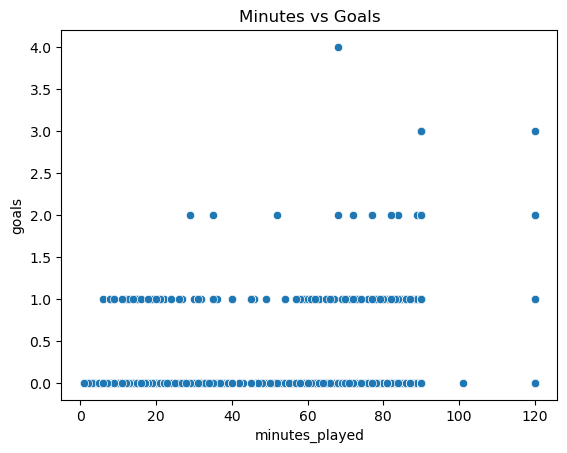

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=appearances_df, x='minutes_played', y='goals')
plt.title('Minutes vs Goals')
plt.show()


In [21]:
appearances_df['goals_per_90'] = appearances_df['goals'] / (appearances_df['minutes_played'] / 90)


In [23]:
from sklearn.linear_model import LinearRegression

X = appearances_df[['minutes_played', 'yellow_cards']]
y = appearances_df['goals']

model = LinearRegression()
model.fit(X, y)

print("Coefficients:", model.coef_)


Coefficients: [ 0.00087319 -0.01674813]


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = appearances_df[['minutes_played', 'yellow_cards']]
y = (appearances_df['goals'] > 1).astype(int)  # binary classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print("Accuracy:", knn.score(X_test, y_test))


Accuracy: 0.992530345471522
